In [1]:
import pandas as pd
import numpy as np
import sklearn.neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import NearestCentroid
import math
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df = df[['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets', 'DEATH_EVENT']]
df

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
0,582,1.9,130,265000.00,1
1,7861,1.1,136,263358.03,1
2,146,1.3,129,162000.00,1
3,111,1.9,137,210000.00,1
4,160,2.7,116,327000.00,1
...,...,...,...,...,...
294,61,1.1,143,155000.00,0
295,1820,1.2,139,270000.00,0
296,2060,0.8,138,742000.00,0
297,2413,1.4,140,140000.00,0


# Question1

In [3]:
df0 = df[df.DEATH_EVENT == 0]
df0Feature = df0[['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]
df1 = df[df.DEATH_EVENT == 1]
df1Feature = df1[['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]

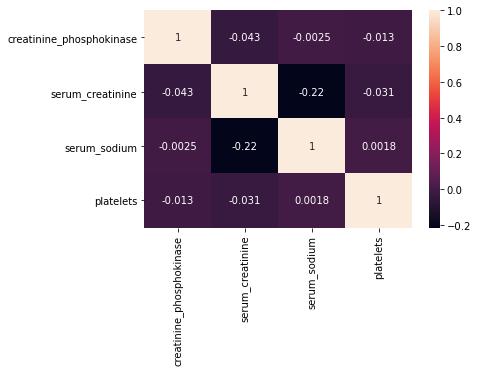

In [4]:
# corr matrix for death_event 0
sn.heatmap(df0Feature.corr(), annot=True)
plt.show()

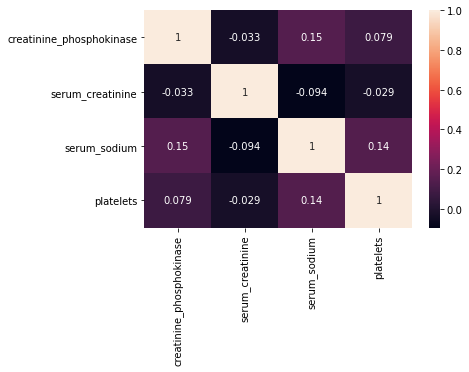

In [5]:
# corr matrix for death_event 1
sn.heatmap(df1Feature.corr(), annot=True)
plt.show()

# Question2

Group3--> 
X = serum sodium, Y = serum creatinine

In [21]:
def residual(yTest, yPredict):
    temp = 0
    for (a, b) in zip(yTest, yPredict):
        temp += (a-b) * (a - b)
    return temp

In [22]:
zeroSet = df0[[ 'serum_creatinine', 'serum_sodium']]
oneSet = df1[[ 'serum_creatinine', 'serum_sodium']]

[-0.02006178  3.95868491]
37.7522760272153
[ 4.38716045e-03 -1.22100846e+00  8.60833650e+01]
41.029217477716145
[ 2.74904980e-04 -1.08363379e-01  1.41794911e+01 -6.14446542e+02]
36.324014896471446
[-2.82231768 15.09510415]
37.64074858610694
[-1.47469291  7.3446293 ]
38.938603465563176


Text(0.5, 1.0, 'log(y) = alog(x) + b')

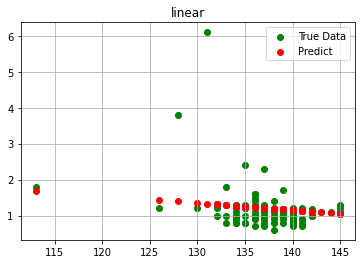

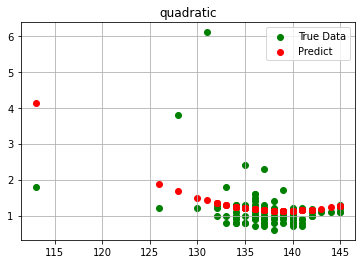

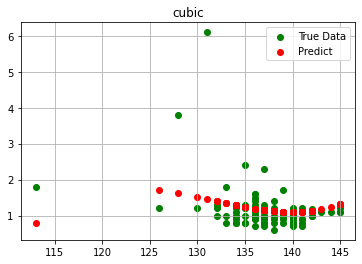

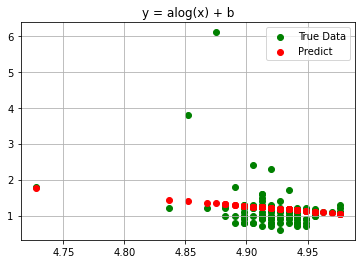

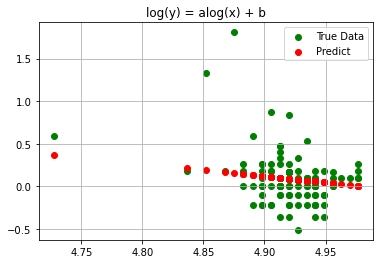

In [63]:
# for death_evetn = 0
# simple linear regression
x = zeroSet['serum_sodium']
y = zeroSet['serum_creatinine']
degree = 1

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('linear')

# quadratic
x = zeroSet['serum_sodium']
y = zeroSet['serum_creatinine']
degree = 2

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('quadratic')


# cubic
x = zeroSet['serum_sodium']
y = zeroSet['serum_creatinine']
degree = 3

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('cubic')

# GLM
x = zeroSet['serum_sodium']
x = np.log(x)
y = zeroSet['serum_creatinine']

degree = 1

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('y = alog(x) + b')

# GLM
x = zeroSet['serum_sodium']
x = np.log(x)
y = zeroSet['serum_creatinine']
y = np.log(y)

degree = 1

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(np.exp(yTest), np.exp(yPredict)))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('log(y) = alog(x) + b')



[-0.01236989  3.8018824 ]
38.63069354525988
[ 9.69912611e-03 -2.65111621e+00  1.83120347e+02]
61.60974727399684
[ 6.93416020e-03 -2.82186374e+00  3.82460077e+02 -1.72620285e+04]
2607.9355538202913
[-1.80477484 10.98470858]
38.58311899419233
[-3.18264613 16.14955754]
22.58026509775523


Text(0.5, 1.0, 'log(y) = alog(x) + b')

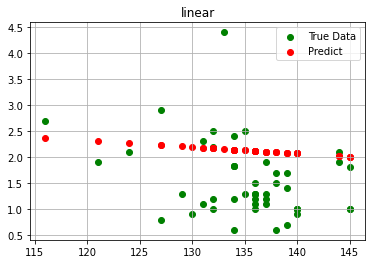

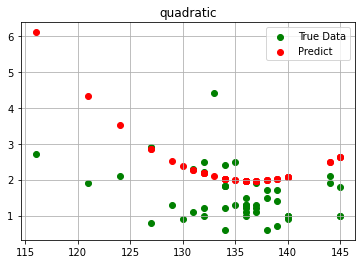

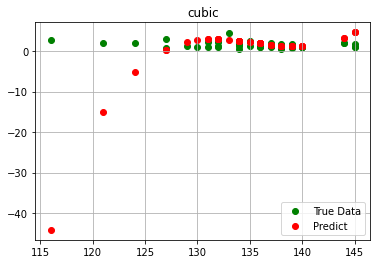

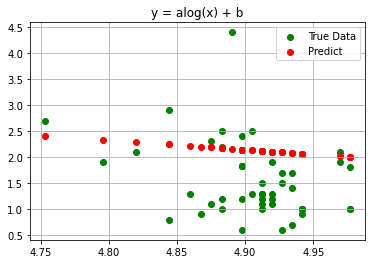

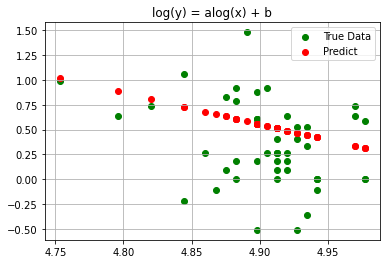

In [65]:
# for death_evetn = 1
# simple linear regression
x = oneSet['serum_sodium']
y = oneSet['serum_creatinine']
degree = 1

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('linear')


# quadratic
x = oneSet['serum_sodium']
y = oneSet['serum_creatinine']
degree = 2

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('quadratic')


# cubic
x = oneSet['serum_sodium']
y = oneSet['serum_creatinine']
degree = 3

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('cubic')

# GLM
x = oneSet['serum_sodium']
x = np.log(x)
y = oneSet['serum_creatinine']

degree = 1

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(yTest, yPredict))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('y = alog(x) + b')

# GLM
x = oneSet['serum_sodium']
x = np.log(x)
y = oneSet['serum_creatinine']
y = np.log(y)

degree = 1

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=  0.5, random_state = 0)

weights = np.polyfit(xTrain, yTrain, degree)
model = np.poly1d(weights)
yPredict = model(xTest)
print(weights)
print(residual(np.exp(yTest), np.exp(yPredict)))
plt.figure()
plt.scatter(xTest, yTest, color = 'green', label = 'True Data')
plt.scatter(xTest, yPredict, color = 'red', label = 'Predict')
plt.grid()
plt.legend()
plt.title('log(y) = alog(x) + b')



